In [1]:
import networkx as nx

G = nx.Graph()

In [5]:
G.add_nodes_from([2,3])

In [3]:
edges = [(2,1),(2,2),(3,2),(4,3),(6,4),(7,5),(14,5)]
G.add_edges_from(edges)

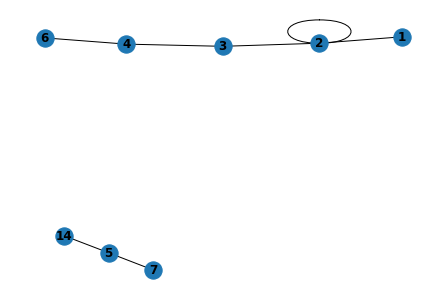

In [6]:
nx.draw(G, with_labels=True, font_weight='bold')
import matplotlib.pyplot as plt
plt.show()